# Blok 1

## Než začnu pracovat
1. Mám pullnuté změny na hlavní větvi?
2. Mám vytvořenou novou větev pro toto cvičení?
3. Mám překopírovaný ipynb soubor do složky `cviceni6/vaseprijmeni`?

## Jak na to
Projděte si jednotlivé buňky, čtěte komentáře.

Pokud Vám něco nebude fungovat, zkuste si prve danou věc opravit.

Zkuste co nejvíce pracovat samostatně, pokud něco nebudu vědět:
1. Zkusím Google
2. Zkusím ChatGPT (správně popište problém)
3. Zkusím se podívat do materiálů v Moodle

## Úkol 1.1
- Vše musí fungovat, pusťte každou buňku, opravte případnou chybu
- Myslím, že Vám nebude fungovat cesta :)

In [2]:
import rasterio
from pathlib import Path
# Cesta k souboru TIF
# Kdo bude frajer a použije Path objekt, dostane bezvýhradný obdiv
cesta_k_souboru = Path("./flora.tif").resolve()

# Načtení obrazového souboru pomocí rasterio
with rasterio.open(cesta_k_souboru) as obraz:

    all_bands = obraz.read()
    # Převedení kanálu na seznam seznamů (vnořených seznamů)
    data_in_nested_list = all_bands.tolist()

# Nyní je proměnná `data_in_nested_list` vnořený seznam,
# kde každý vnitřní seznam reprezentuje jeden band a v něm vnitřní seznamy řádku obrazových dat

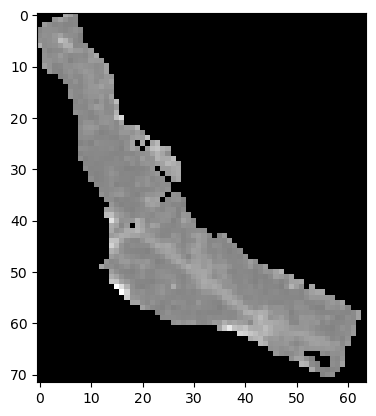

In [3]:
import matplotlib.pyplot as plt

# Zobrazíme si první band jako obrázek
plt.imshow(data_in_nested_list[1], cmap='gray')

In [4]:
#Zjistíme počet bandů
print(len(data_in_nested_list))

# Zjistíme počet řádků
print(len(data_in_nested_list[0]))

# Zjistíme počet hodnot v prvním řádku obrazových dat
print(len(data_in_nested_list[0][0]))

3
72
64


In [5]:
# Nyní si zobrazíme předposlední hodnotu, předposledního řádku, předposledního bandu
# Všimněte si, jak se k hodnotám vnořeného seznamu dostáváme!
print(data_in_nested_list[-2][-2][-2])

0


In [6]:
# U tohoto posledního řádku, posledního bandu si zobrazíme poslední hodnoty na 55. až 57. pozici.
# Všimněte si, že u slicingu je start včetně a end nevčetně.
print(data_in_nested_list[-2][-2][55:58])

[7827, 8251, 8589]


In [7]:
# Mohu si je vytisknout i obráceně pomocí krokování.
# Všimněte si, jak se musejí start a end prohodit.
print(data_in_nested_list[-2][-2][57:54:-1])

[8589, 8251, 7827]


## Úkol 1.2
- Vytiskněte pomocí printu z 2. bandu na předposlední řádce prvních 5 hodnot.
- Buňku spusťte.

In [8]:
print(data_in_nested_list[-2][1][0:5])

[0, 0, 0, 8789, 9472]


## Úkol 1.3
Pozor! Pro vše použijete pouze selectování pomocí []!
Pokud nebudu vědět, experimentuji! Udělám si třeba i buňku bokem a zkouším.

- Vyberte první band rastru a uložte si jej do proměnné s názvem `band_upraveny`.
- Pátému řádku přiřaďte hodnoty z 1. řádku.
- Třicátému řádku přiřaďte hodnoty z toho samého řádku, ale v opačném pořadí!
- Na padesátém řádku, u desáté hodnoty, nastavte hodnotu na 15000.
- Zobrazte si výsledek o buňku dál a porovnejte s původními daty. Proč se obrázky liší, nebo neliší?

In [9]:
band_upraveny = data_in_nested_list[0]
band_upraveny[4] = band_upraveny[0]
band_upraveny[29] = band_upraveny[29][::-1]
band_upraveny[50][4] = 15000


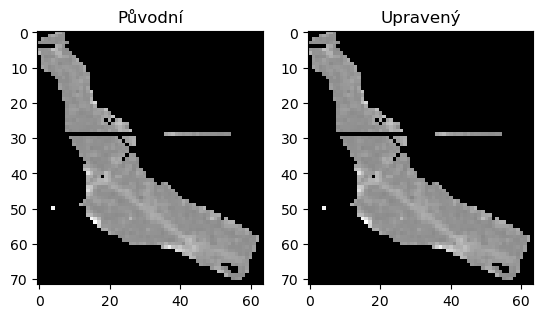

In [10]:
# Vizualizace dvou obrázků vedle sebe
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(data_in_nested_list[0], cmap='gray')
ax1.set_title('Původní')
ax2.imshow(band_upraveny, cmap='gray')
ax2.set_title('Upravený')
plt.show()

## Úkol 1.4
- Vytvořte první commit do nové větve. V commit message napište, co Vám dělalo největší problém.

# Blok 2
Nyní víte něco málo o vestavěných funkcích, které lze použít s Listy, a metodách Listu.

Pokud nevíte, jak udělat úkol, vězte, že stačí jednoduché aplikace funkcí či metod. Není třeba vymýšlet složité konstrukce.

Jednodušší řešení = lepší řešení.

Můžete si poáhat vytvářením referencí na jednotlivé části snímku, ať stále nepoužívate index selectory, pokud Vám jsou nepříjemné.

## Úkol 2.1
- Již jsme v prvním bloku použili jednu vestavěnou funkci pro zjištění počtu prvků v seznamu.
- Napište kód, který vyprintuje počet řádků v posledním bandu snímku.

In [11]:
#počet řádků v posledním bandu snímku
print(len(data_in_nested_list[-1]))

72


## Úkol 2.2
- Do 35. řádku 1. bandu přidejte metodou listu hodnotu 15000.
- Odeberte nyní metodou listu první prvek.
- Spusťe buňku se zobrazením rastru, abyste viděli změny. Pokud nevidíte změnu, možná jste omylem odebrali poslední prvek namísto prvního?
- Je možné, že jste si experimentováním rozbili nahraný rastr. :) Pokud ano, nahrajte jej znovu (první buňka sešitu)

In [15]:
#do 35. řádku 1. bandu přidat metodou list hodnotu 15000
data_in_nested_list[0][35].append(15000)
#odebrání první prvek
data_in_nested_list[0][35].pop(0)

0

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (72,) + inhomogeneous part.

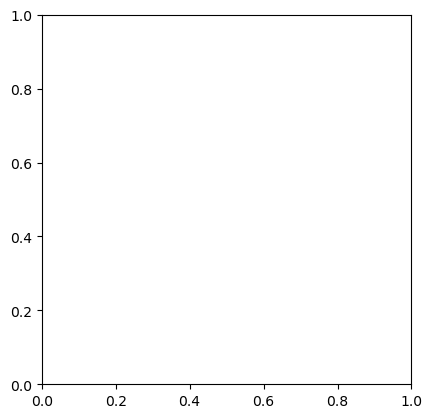

In [16]:
plt.imshow(data_in_nested_list[0], cmap='gray')

## Úkol 2.3
- Vytiskni součet všech hodnot na předposledním řádku 2. bandu.
- Vytiskni počet výskytu nul na 10. řádku od konce v posledním bandu.
- Vytiskni maximální hodnotu 35. řádku 1. bandu.
- Vytiskni List maximálních hodnot v 1. bandu (toto pozkoušejte, co Vám bude fungovat).
- Vytiskni maximální hodnotu z Listu maximálních hodnot z předchozího kroku.

In [22]:
#součet hodnot na předposledním řádku 2.bandu
print(sum(data_in_nested_list[1][-2]))
#vytisknutí výskytu nul na 10. řádku od konce v posledním bandu
print(data_in_nested_list[-1][-10].count(0))
#vytisknutí max. hodnoty 35.řádku 1.bandu
print(max(data_in_nested_list[0][35]))
#vytisknutí list max. hodnot v 1. bandu 
print(max(data_in_nested_list[0]))
#vytisknutí maximalní hodnotu z listu maximálních hodnot
print(max(max(data_in_nested_list)))


24667
41
15000
[11023, 8920, 9044, 8919, 9372, 10766, 10816, 8732, 8834, 8804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[11023, 8920, 9044, 8919, 9372, 10766, 10816, 8732, 8834, 8804, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Úkol 2.4
- Commitni změny, do zprávy commitu napiš maximální hodnotu z Listu maximálních hodnot z úlohy 2.3

# Blok 3

Jdeme na smyčky! Uplatníte všechny předešlé dovednosti plus for loops!

## Úkol 3.1

- Projděte a spusťte všechny bloky.
- Zkuste jim všem do detailu porozumět.
- Pokud něčemu nerozumíte, můžete kód upravovat, izolovat do menších celků, Googlit a ptát se. :)

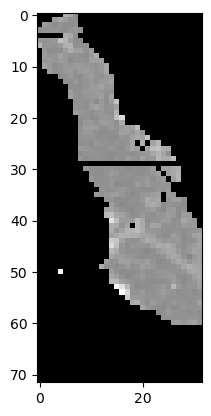

In [23]:
# Mohu projít všechny řádky a oříznout obrázek tím, že vyberu pouze polovinu hodnot z řádků!

# Vytvořím si prázdný seznam, do kterého budu ukládat upravené řádky
oriznuty_band = []

# Zjistím si počet hodnot v řádku (všechny stejné)
pocet_hodnot_v_radku = len(data_in_nested_list[0][0])

# Dělím 2, ať mám polovinu hodnot
# Použiji //, ať mám celočíselné dělení!!!
# Pro výběr indexů mohu použít pouze celá čísla
polovina_hodnot = pocet_hodnot_v_radku//2

# Projdu každý řádek v bandu
for radek in data_in_nested_list[0]:
    # Přidám do seznamu pouze první polovinu hodnot
    oriznuty_band.append(radek[:polovina_hodnot])

# Vytvořím si z toho nový obrázek pro kontrolu
plt.imshow(oriznuty_band, cmap='gray')

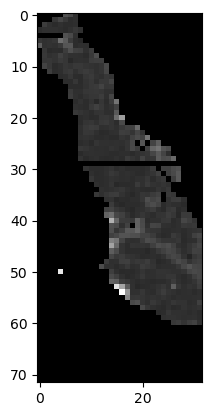

In [24]:
# V tomto ořezu pak udělám transformaci dat!
# Hodnoty umocním na třetí ať se nám lépe pracuje s rozdíly

# Vytvořím si prázdný seznam, do kterého budu ukládat upravené řádky
band_umocneny = []

# Projdu každý řádek v bandu
for radek in oriznuty_band:
    # Projdu každou hodnotu v řádku
    radek_umocneny = []
    for hodnota in radek:
        # Přidám do seznamu umocněnou hodnotu
        radek_umocneny.append(hodnota**3)

    # Přidám řádek do bandu
    band_umocneny.append(radek_umocneny)

# Vytvořím si z toho nový obrázek pro kontrolu
plt.imshow(band_umocneny, cmap='gray')

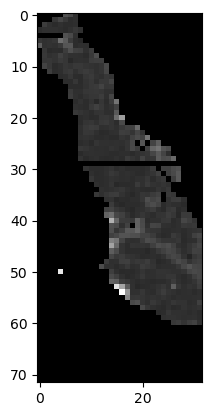

In [25]:
band_umocneny = []

for radek in oriznuty_band:
    # Mohu použít List Comprehension pro zkrácení kódu
    # Všimněte si, že tyto dva kódy dělají totéž!
    radek_umocneny = [hodnota**3 for hodnota in radek]
    band_umocneny.append(radek_umocneny)

plt.imshow(band_umocneny, cmap='gray')

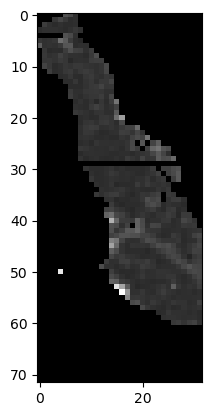

In [26]:
# List Comprehension mohu ale vnořit do sebe samého!
# Mohu mít ještě elegantnější zápis!
band_umocneny = [[hodnota**3 for hodnota in radek] for radek in oriznuty_band]
plt.imshow(band_umocneny, cmap='gray')

# Stále jde ale o stejný kód, jen zapsaný jinak!

## Úloha 3.2
- Vytvořte nový band z bandu číslo 1, který:
    - Přetransformuje hodnoty ≤ 9000 na 0
    - Hodnoty > 9000 na 1
- Nemusíte používat List Comprehension, ale získáte si nehynoucí slávu, pokud jej využijete!
- If/Else v List Comprehension může vypadat nějak takto: `hodnota_kdyz_splnena_podminka if podminka else hodnota_kdyz_nesplnena for hodnota in radek`

In [28]:
# vytvoreni nového bandu z bandu číslo 1 který předstransformuje hodnoty <= 9000 na 0 a hodnoty > 9000 na 1
band_transformovany = [[0 if hodnota <= 9000 else 1 for hodnota in radek] for radek in data_in_nested_list[1]]

## Bonusová úloha
- Nyní vytvořte band, který do své buňky přiřadí maximální hodnotu ze všech tří původních bandů.
- Asi budete muset využít for i cyklus a funkce len a range. :)

In [29]:
#vytvoreni bandu který do bunky priradi maximalní hodnotu ze všech tří puvodních bandu
band_maximalni = [[max(hodnota[0], hodnota[1], hodnota[2]) for hodnota in zip(*radek)] for radek in zip(data_in_nested_list[0], data_in_nested_list[1], data_in_nested_list[2])]

## Úloha 3.3
- Ulož změny, commitni změny.
- Vytvoř nový Pull Request.

# Zvládli jsme to!

Díky za pozornost a spolupráci!
Těším se zase příště!

![image.png](https://qph.cf2.quoracdn.net/main-qimg-4472b6229cb75bf66ab531f3ebd4f975-lq)